In [1]:
import numpy as np

In [2]:
import pickle


with open('results_31r.pickle', 'rb') as f:
    data31 = pickle.load(f) # 단 한줄씩 읽어옴

In [3]:
data31

{'coherence_levels': [0.032, 0.064, 0.128, 0.256, 0.512, 1],
 'time_to_A': array([[0.2852, 0.    , 0.403 , 0.7642, 0.    , 0.    , 0.    , 0.2942,
         0.    , 0.2497, 0.1708, 0.    , 1.8614, 0.8103, 0.    , 0.    ,
         0.    , 0.    , 0.    , 0.7357, 0.    , 1.4769, 0.315 , 0.    ,
         0.6099, 0.    , 0.    , 0.345 , 0.    , 0.    ],
        [0.4858, 0.2507, 0.    , 0.2363, 0.7872, 0.    , 0.554 , 0.    ,
         0.    , 0.6413, 0.5667, 0.6497, 0.4862, 0.3988, 1.4124, 0.0957,
         0.1876, 0.4483, 0.    , 0.    , 0.    , 0.6471, 0.    , 0.    ,
         0.4007, 0.    , 0.3957, 0.    , 0.41  , 0.2274],
        [0.4954, 0.5061, 0.    , 0.5662, 0.1807, 0.6827, 0.4547, 0.    ,
         0.3007, 0.4763, 0.294 , 0.2523, 0.2224, 0.    , 1.0653, 0.5485,
         0.    , 0.5993, 0.    , 0.6775, 0.    , 0.3714, 0.2798, 0.    ,
         0.2867, 0.2903, 0.3961, 0.3549, 0.3367, 0.51  ],
        [0.3744, 0.4899, 0.4558, 0.2278, 0.3736, 0.364 , 0.384 , 0.3019,
         0.3046, 0.338

In [4]:
data31.keys()

dict_keys(['coherence_levels', 'time_to_A', 'time_to_B', 'count_A', 'count_B', 'count_No'])

In [17]:
correct_rate = data31['count_A']/30

In [18]:
correct_rate

array([0.43333333, 0.63333333, 0.76666667, 0.86666667, 1.        ,
       1.        ])

In [19]:
import matplotlib.pyplot as plt


In [20]:
data31['coherence_levels']

[0.032, 0.064, 0.128, 0.256, 0.512, 1]

In [21]:
coh_level = [item * 100 for item in data31['coherence_levels']]

In [22]:
coh_level

[3.2, 6.4, 12.8, 25.6, 51.2, 100]

In [23]:
import math

In [24]:
math.prod(data31['coherence_levels'] )

3.435973836800001e-05

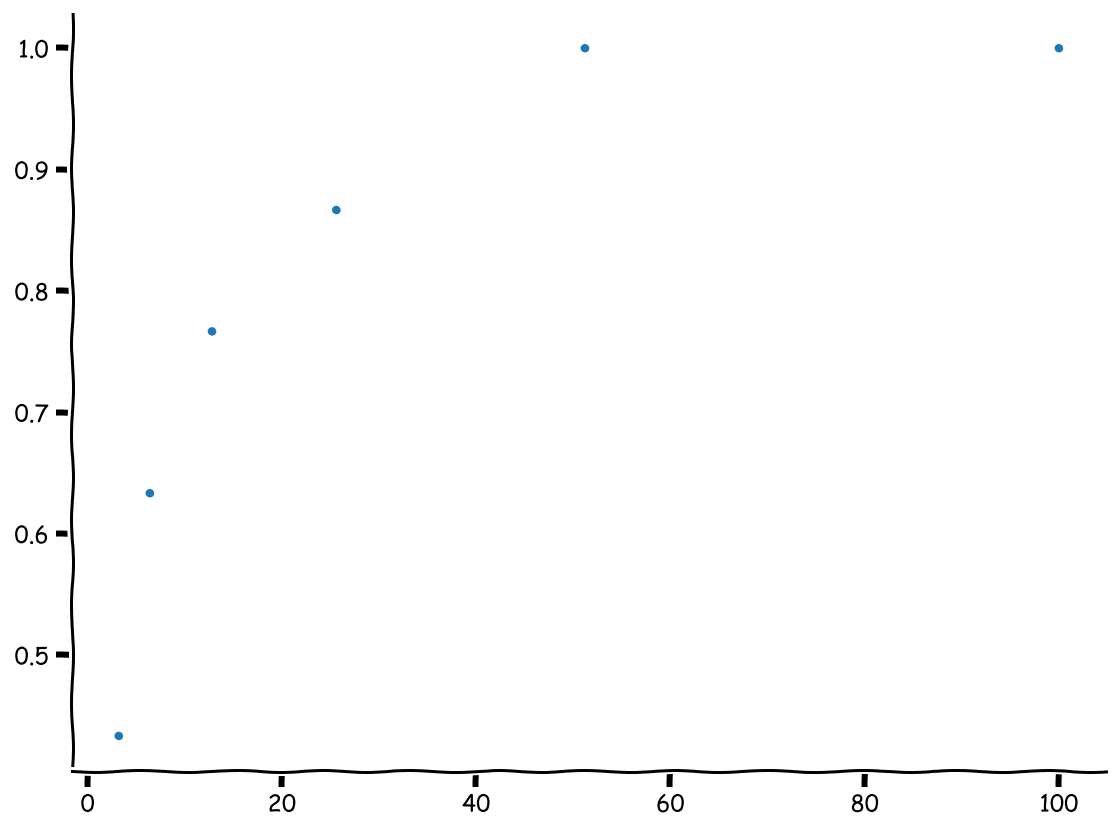

In [25]:

with plt.xkcd():
    plt.plot(coh_level, correct_rate, '.')
    plt.show()

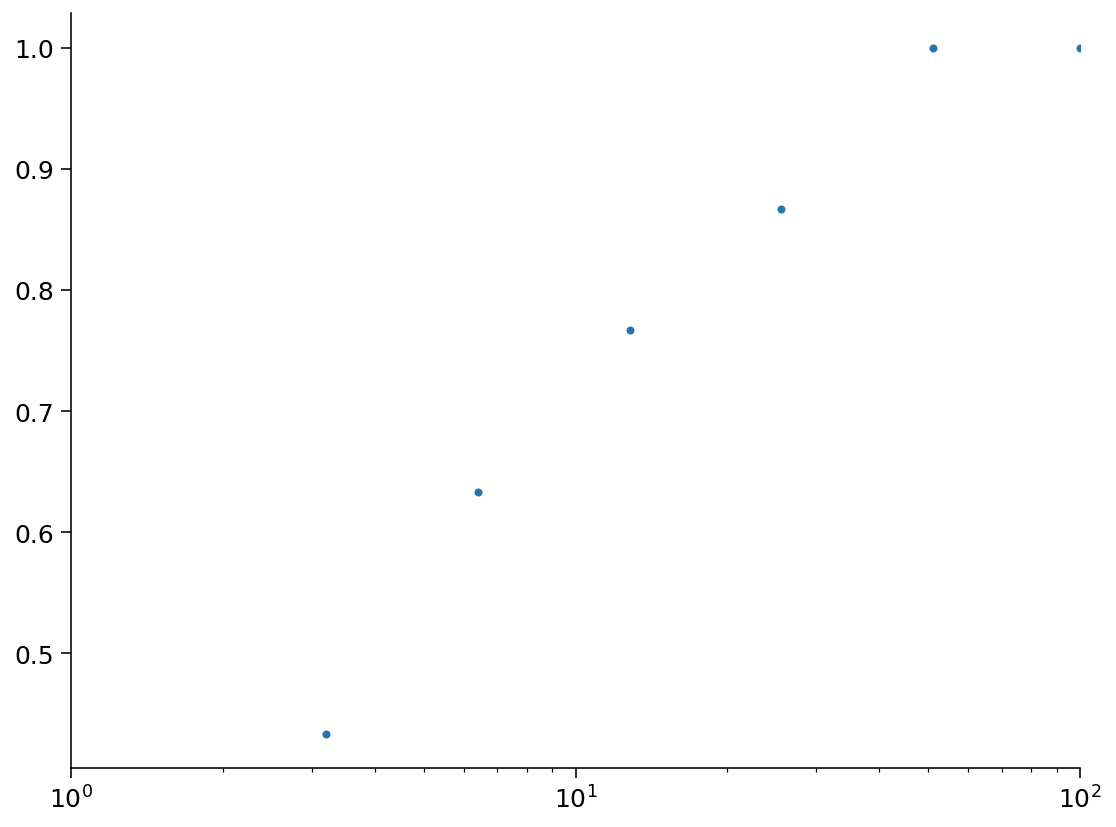

In [26]:
plt.plot(coh_level, correct_rate, '.')
plt.xscale('log')
plt.xlim([1, 100])
plt.show()

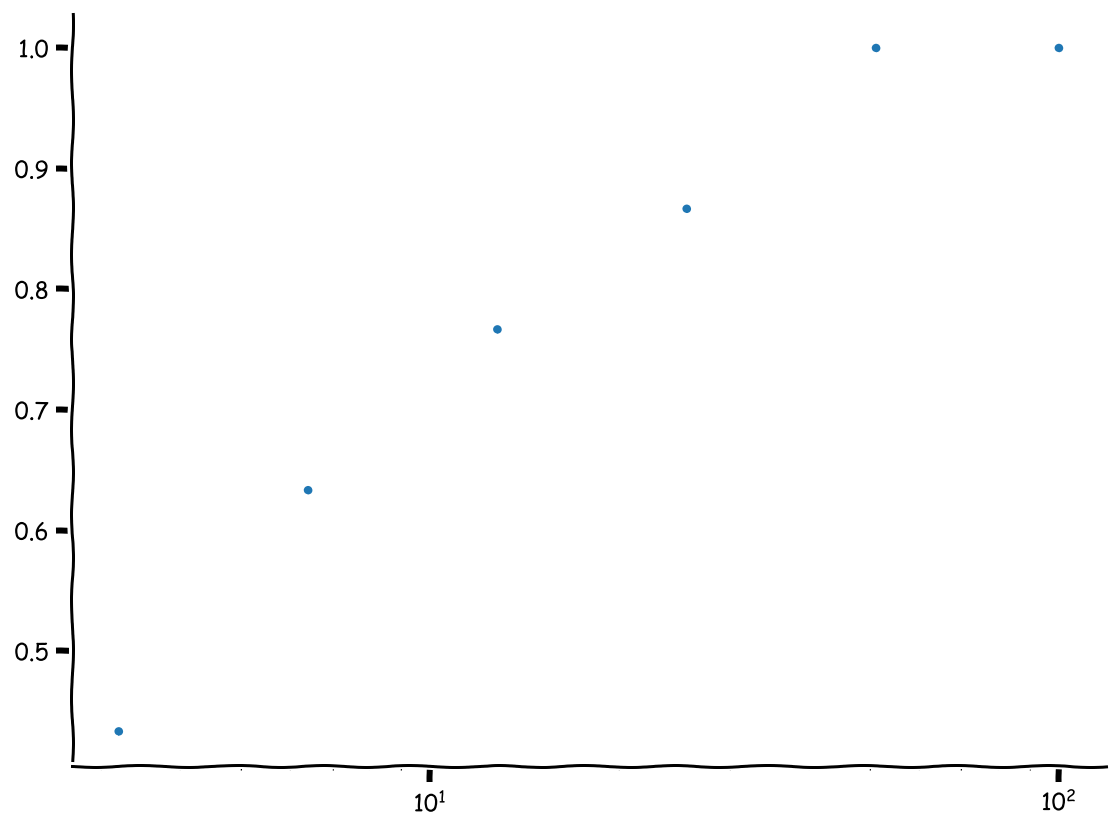

In [27]:
with plt.xkcd():
    plt.xscale("log")
    plt.plot(coh_level, correct_rate, '.')
    plt.show()
    


In [28]:
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

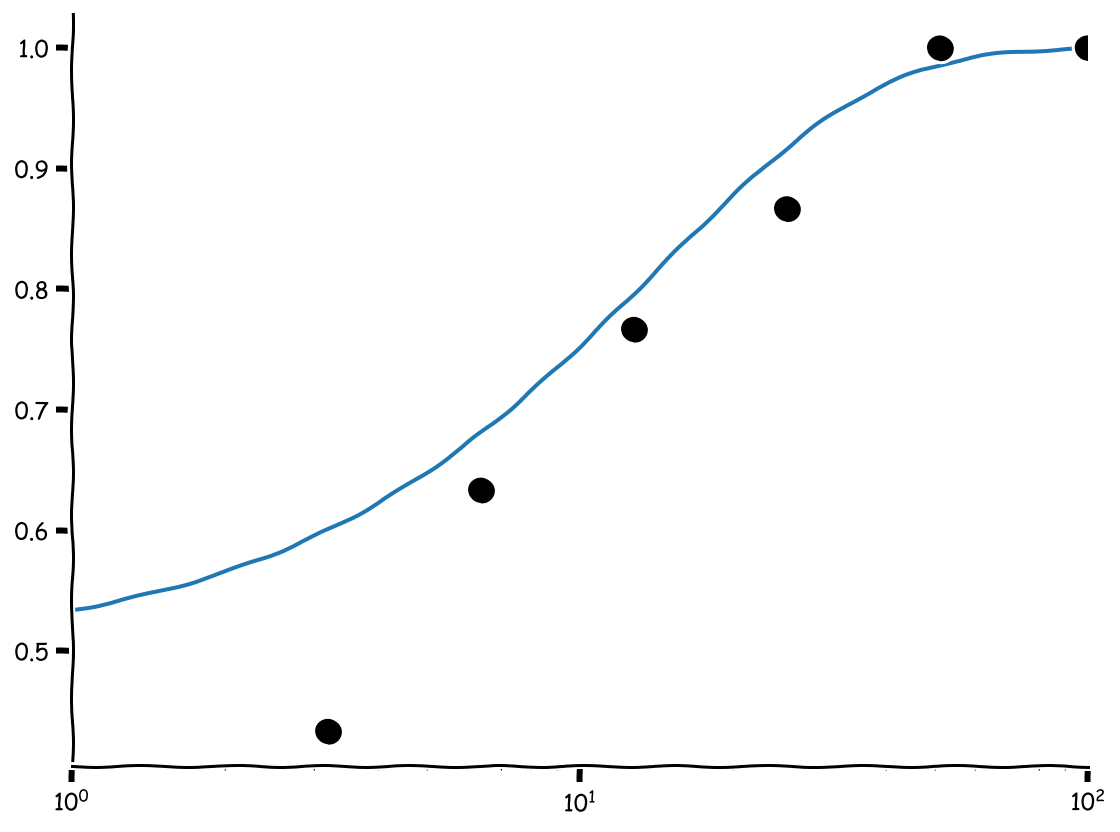

In [34]:
def Weibull(coh_level, alpha,beta):
    """
    Population activation function.
    Args:
    x (float): the population input
    a (float): the gain of the function
    theta (float): the threshold of the function
    Returns:
    float: the population activation response F(x) for input x
    """

    # Define the sigmoidal transfer function f = F(x)
    
    f = 1 - .5*np.exp(-(coh_level/alpha)**beta)

    return f

# Set parameters
coh_level_analytic = np.arange(1, 100, 0.1)

# Compute transfer function
f = Weibull(coh_level_analytic, 14.2 , 1.0)


# Visualize
with plt.xkcd():
    plt.plot(coh_level_analytic, f)
    plt.xscale('log')
    plt.xlim([1, 100])
    #plt.plot(coh_level, correct_rate, '.')
    plt.plot(coh_level, correct_rate, "ko", ms=12)
    plt.show()

# $1 - 0.5e^{-(\frac{c'}{\alpha})^{\beta}} $

In [35]:
 f = 1 - .5*np.exp(-(coh_level/alpha)**beta)

NameError: name 'alpha' is not defined

In [39]:
coh_level

[3.2, 6.4, 12.8, 25.6, 51.2, 100]

In [40]:
correct_rate

array([0.43333333, 0.63333333, 0.76666667, 0.86666667, 1.        ,
       1.        ])

In [38]:
# Visualize
def plot_Weibull(alpha, beta, coh_level, correct_rate):


    # Set parameters
    coh_level_analytic = np.arange(1, 100, 0.1)

    # Compute transfer function
    f = Weibull(coh_level_analytic, alpha , beta)
    
    plt.figure()
    plt.plot(coh_level_analytic, f)
    plt.xscale('log')
    plt.xlim([1, 100])
    #plt.plot(coh_level, correct_rate, '.')
    plt.plot(coh_level, correct_rate, "ko", ms=12)
    plt.show()
    
_ = widgets.interact(plot_Weibull, alpha=(0, 20, 1), beta = (0, 5, 1) ,coh_level, correct_rate )

SyntaxError: positional argument follows keyword argument (3089648865.py, line 19)

In [32]:
plot_Weibull(9.2, 1.5 , coh_level, correct_rate )

NameError: name 'plot_Weibull' is not defined

In [44]:
coh_level

[3.2, 6.4, 12.8, 25.6, 51.2, 100]

In [45]:
correct_rate

array([0.43333333, 0.63333333, 0.76666667, 0.86666667, 1.        ,
       1.        ])

In [50]:
# Visualize
def plot_Weibull(alpha, beta):


    # Set parameters
    coh_level_analytic = np.arange(1, 100, 0.1)
    coh_level = [3.2, 6.4, 12.8, 25.6, 51.2, 100]   
    correct_rate = [0.43333333, 0.63333333, 0.76666667, 0.86666667, 1.        ,1.        ]
    

    # Compute transfer function
    f = Weibull(coh_level_analytic, alpha , beta)
    with plt.xkcd():    
        plt.figure()
        plt.plot(coh_level, correct_rate, "ko", ms=12)
        plt.plot(coh_level_analytic, f)
        plt.xscale('log')
        plt.xlim([1, 100])
        plt.xlabel('Coherence %')
        plt.ylabel('Correct rate')
        #plt.plot(coh_level, correct_rate, '.')
        plt.show()
    
_ = widgets.interact(plot_Weibull, alpha=(0, 20, 1), beta = (0, 5, 0.1) )

interactive(children=(IntSlider(value=10, description='alpha', max=20), FloatSlider(value=2.0, description='be…

In [ ]:
# Visualize
def plot_Weibull(alpha, beta):


    # Set parameters
    coh_level_analytic = np.arange(1, 100, 0.1)

    # Compute transfer function
    f = Weibull(coh_level_analytic, alpha , beta)
    
    plt.figure()
    plt.plot(coh_level_analytic, f)
    plt.xscale('log')
    plt.xlim([1, 100])
    #plt.plot(coh_level, correct_rate, '.')
    plt.show()
    
_ = widgets.interact(plot_Weibull, alpha=(0, 20, 1), beta = (0, 5, 1) )

In [51]:
# Visualize
def plot_Weibull(alpha, beta):


    # Set parameters
    coh_level_analytic = np.arange(1, 100, 0.1)
    coh_level = [3.2, 6.4, 12.8, 25.6, 51.2, 100]   
    correct_rate = [0.43333333, 0.63333333, 0.76666667, 0.86666667, 1.        ,1.        ]
    

    # Compute transfer function
    f = Weibull(coh_level_analytic, alpha , beta)
    plt.figure()
    plt.plot(coh_level, correct_rate, "ko", ms=12)
    plt.plot(coh_level_analytic, f)
    plt.xscale('log')
    plt.xlim([1, 100])
    plt.xlabel('Coherence %')
    plt.ylabel('Correct rate')
    #plt.plot(coh_level, correct_rate, '.')
    plt.show()

_ = widgets.interact(plot_Weibull, alpha=(0, 20, 1), beta = (0, 5, 0.1) )

interactive(children=(IntSlider(value=10, description='alpha', max=20), FloatSlider(value=2.0, description='be…